## Gold price prediction

Dataset 🔗 :  "https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data"

This data file is a Comma separated value file format with 2290 rows and 7 columns. It contains 5 columns which are numerical in datatype and one column in Date format. 

- **SPX** (S&P 500 Index): This represents the Standard & Poor's 500 Index, which tracks the performance of 500 large companies listed on stock exchanges in the U.S. It’s a key indicator of the overall performance of the U.S. stock market. Gold prices often have an inverse relationship with stock indices, as investors may turn to gold as a safe-haven asset during stock market declines.

- **GLD** (Gold ETF): This is the SPDR Gold Trust ETF, a popular exchange-traded fund that tracks the price of gold. GLD serves as a proxy for gold prices in financial markets and is highly correlated with gold's spot price.

- **USO** (United States Oil Fund): This ETF tracks the daily price changes of crude oil. Oil prices can influence gold prices because both are commodities with economic and inflation implications. Rising oil prices can lead to higher inflation, which may increase the demand for gold as a hedge against inflation.

- **SLV** (Silver ETF): This is the iShares Silver Trust ETF, which tracks the price of silver. Silver and gold prices often move together because they are both precious metals and share similar market and economic influences.

- **EUR/USD** (Euro to U.S. Dollar Exchange Rate): This exchange rate represents the value of the Euro against the U.S. Dollar. A weaker dollar often boosts gold prices as it makes gold cheaper for investors holding other currencies, while a stronger dollar can have the opposite effect.

- **Date** : This is the date on which the data is recorded. It is essential for understanding time trends and analyzing the historical performance of each feature over time to make accurate predictions for future gold prices.


### Importing Neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df=pd.read_csv('E:/ML projects/workspace/dataset/gld_price_data.csv')

### Dataset overview

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
df.shape

(2290, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Checking for null values

In [9]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

### Checking for Duplicate values

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['Date']=pd.to_datetime(df['Date'])

In [13]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


### Exploratory Data Analysis

In [14]:
df.head(3)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492


In [15]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

<Axes: >

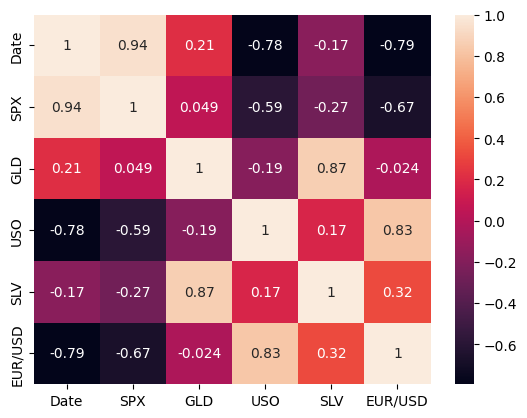

In [16]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='EUR/USD', ylabel='Count'>

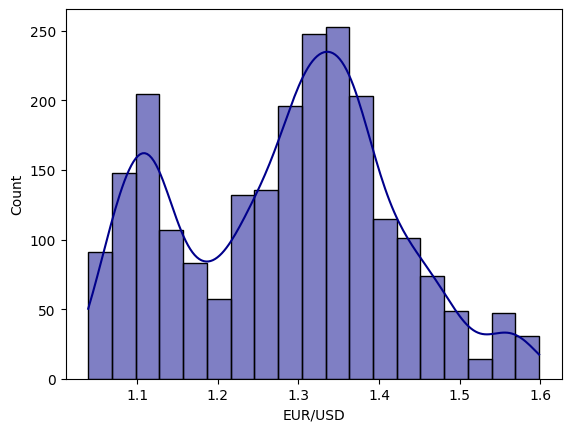

In [19]:
sns.histplot(x='EUR/USD',data=df,kde=True,color='darkblue')

<Axes: xlabel='GLD', ylabel='USO'>

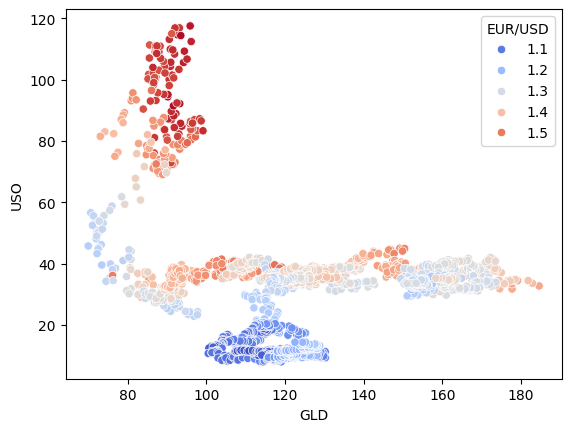

In [21]:
sns.scatterplot(x='GLD',y='USO',data=df,hue='EUR/USD',palette='coolwarm')

<Axes: xlabel='GLD', ylabel='SLV'>

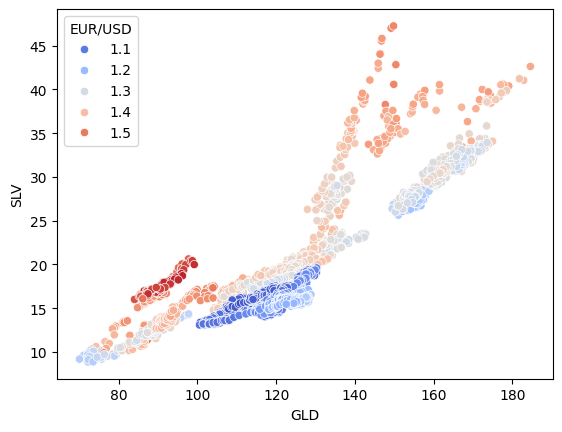

In [22]:
sns.scatterplot(x='GLD',y='SLV',data=df,hue='EUR/USD',palette='coolwarm')

<Axes: xlabel='SPX', ylabel='USO'>

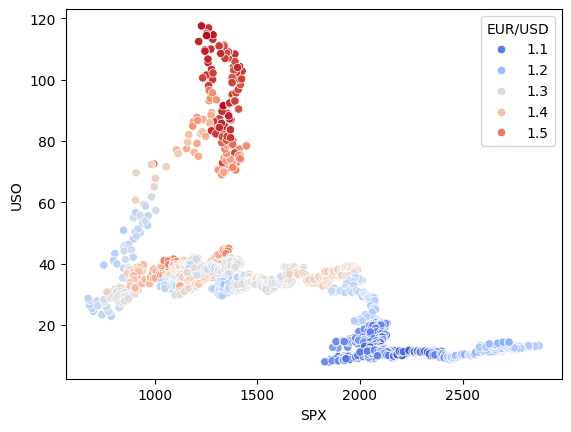

In [23]:
sns.scatterplot(x='SPX',y='USO',data=df,hue='EUR/USD',palette='coolwarm')

<Axes: >

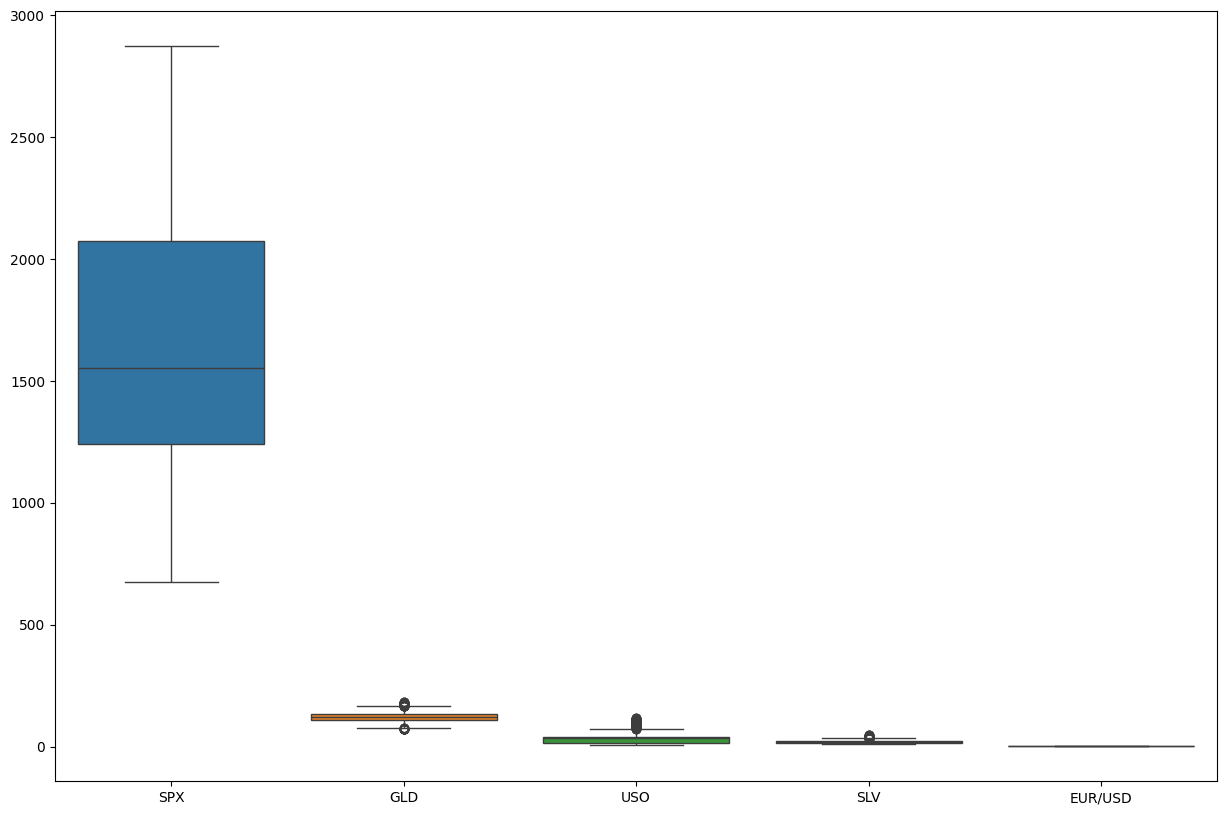

In [26]:
plt.figure(figsize=(15,10))
sns.boxplot(df)

### Independent and dependent features

In [37]:
x=df.drop(['EUR/USD','Date'],axis=1)
y=df['EUR/USD']

In [38]:
x

,SPX,GLD,USO,SLV
0,1447.160034,84.860001,78.470001,15.1800
1,1447.160034,85.570000,78.370003,15.2850
2,1411.630005,85.129997,77.309998,15.1670
3,1416.180054,84.769997,75.500000,15.0530
4,1390.189941,86.779999,76.059998,15.5900
...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100
2286,2697.790039,124.330002,14.370000,15.5300
2287,2723.070068,125.180000,14.410000,15.7400
2288,2730.129883,124.489998,14.380000,15.5600


In [39]:
y

0       1.471692
1       1.474491
2       1.475492
3       1.468299
4       1.557099
          ...   
2285    1.186789
2286    1.184722
2287    1.191753
2288    1.193118
2289    1.182033
Name: EUR/USD, Length: 2290, dtype: float64

### Splitting data for training and testing

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15)

In [41]:
x_train

,SPX,GLD,USO,SLV
36,1371.800049,92.739998,78.739998,17.990000
2003,2280.899902,113.970001,11.280000,16.230000
405,1091.380005,112.940002,39.419998,18.219999
1147,1552.099976,155.380005,33.650002,27.950001
772,1313.640015,152.770004,37.930000,35.200001
...,...,...,...,...
943,1358.589966,161.100006,38.509998,30.790001
630,1189.400024,133.110001,35.970001,26.129999
2133,2465.100098,128.130005,10.030000,17.100000
1739,2088.870117,102.459999,13.390000,13.520000


In [42]:
x_train.shape,x_test.shape

((1832, 4), (458, 4))

### Standardization

In [43]:
scaler=StandardScaler()
scaler

StandardScaler()

In [44]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### Model training and Evaluation

#### LinearRegression

In [45]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(f"r squared score : ",r2_score(y_test,y_pred))
print(f"mean_absolute_error : ",mean_absolute_error(y_test,y_pred))
print(f"mean_squared_error : ",mean_squared_error(y_test,y_pred))

r squared score :  0.7433934286200112
mean_absolute_error :  0.05414566691363237
mean_squared_error :  0.004224736866285664


#### Xgboost

In [46]:
model=XGBRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(f"r squared score : ",r2_score(y_test,y_pred))
print(f"mean_absolute_error : ",mean_absolute_error(y_test,y_pred))
print(f"mean_squared_error : ",mean_squared_error(y_test,y_pred))

r squared score :  0.9755706153663348
mean_absolute_error :  0.013520627359281976
mean_squared_error :  0.0004022021779391035


#### Random Forest

In [47]:
model=RandomForestRegressor(n_estimators=50)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(f"r squared score : ",r2_score(y_test,y_pred))
print(f"mean_absolute_error : ",mean_absolute_error(y_test,y_pred))
print(f"mean_squared_error : ",mean_squared_error(y_test,y_pred))

r squared score :  0.9812969165178724
mean_absolute_error :  0.011640771790393047
mean_squared_error :  0.00030792510836815095
